In [22]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [23]:
df1=pd.read_csv('dataset\tomato-province.csv',engine='python', encoding='utf-8',encoding_errors='ignore')
#df_county1.drop(columns=['Province_number', 'County_number'])
#display(df_county1)

OSError: [Errno 22] Invalid argument: 'dataset\tomato-province.csv'

In [ ]:
#df_county2 = df_county1[['Province','County','Region','Region_NW1SW2NE3','growth_days','irrig_count'
#                         ,'irrig_wat_m3ha','Ecwat','soil_texture_heavy0normallight1'
#                         , 'ETo_mm','elevation_m', 'latitude','longitude','yield_tonha' ]].copy()
df2=df1.copy()
display(df2)
df2=df1[['Province','Province_no','Farm_count','ECwatirrig_dsm','LongitudeDegree','LatitudeDegree'
         ,'SoilTexture1Light2Normal3Heavy','GrowthLength150200_123','number_of_irrig'
         ,'effective_rain_fao_currentyear_mm','Et_clim_data_this_year_mm'
                       ,'water_vol_m3ha','yield_kgha','leeching_need_percent']].copy()
display(df2)


In [97]:

x_ecwat = df2['ECwatirrig_dsm'].to_numpy()
x_soil = df2['SoilTexture1Light2Normal3Heavy'].to_numpy()
x_gd  = df2['GrowthLength150200_123'].to_numpy()
x_ie = df2['number_of_irrig'].to_numpy()
x_eto = df2['Et_clim_data_this_year_mm'].to_numpy()
x_rain = df2['effective_rain_fao_currentyear_mm'].to_numpy()
x_wat = df2['water_vol_m3ha'].to_numpy()
x_leech=df2['leeching_need_percent'].to_numpy()
x_longt=df2['LongitudeDegree'].to_numpy()
x_lat=df2['LatitudeDegree'].to_numpy()

y= df2['yield_kgha'].to_numpy()
N=11
x=np.c_[x_ecwat,x_soil,x_gd,x_ie,x_eto,x_rain,x_wat,x_leech,x_longt,x_lat]
province=df2['Province'].astype(str).values.tolist()

[ 0.676 -0.093  0.255  0.58   0.     0.     0.     0.     0.     0.
  0.     0.     0.   ]


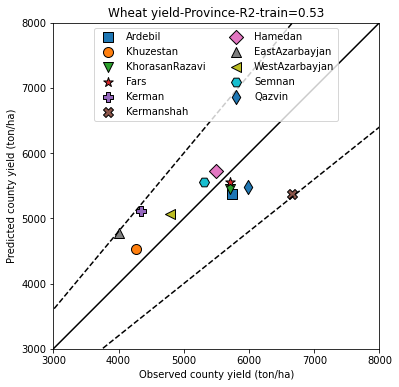

In [98]:

ind=np.random.choice(N,N)<N*0.7

ind=y<1000


a = [1.358, 0,0,0,0,0,0,0,0,0,0,0,0]

def func1(a,x): 
    x_ecwat=x[:,0]
    x_soil=x[:,1]
    x_gd=x[:,2]
    x_ie=x[:,3]
    x_eto=x[:,4]
    x_rain=x[:,5]
    x_wat=x[:,6]
    x_leech=x[:,7]
    x_longt=x[:,8]
    x_lat=x[:,9]
    
    #return 5000*(a[0]+a[1]*x_gd/3+a[2]*x_eto/900+a[3]*x_wat/10000)
    #return 5000*(a[0]+a[1]*x_soil+a[2]*x_rain/300+a[3]*x_wat/10000)
    #return 5000*(a[0]+a[1]*x_ecwat/3+a[2]*x_gd/3+a[3]*x_wat/10000)
    #return 5000*(a[0]+a[1]*x_ie/10+a[2]*x_rain/300+a[3]*x_wat/10000)
    #return 5000*(a[0]+a[1]*x_lat/40+a[2]*x_rain/300+a[3]*x_wat/10000)
    #return 5000*(a[0]+a[1]*x_longt/60+a[2]*x_rain/300+a[3]*x_wat/10000)
    return 5000*(a[0]+a[1]*x_leech/5+a[2]*x_rain/300+a[3]*x_wat/10000)




func2= lambda a: np.dot(y-func1(a,x),y-func1(a,x))/50**2


res = minimize(func2,a)
a=np.round(res.x,3)

print(a)

y1= 5000*(0.401+0.429*x_gd/3+0.103*x_eto/900+0.374*x_wat/10000)
y2= 5000*(-0.074+0.252*x_soil+0.361*x_rain/300+0.616*x_wat/10000)
y3 = 5000*(0.473+-0.119*x_ecwat/3+0.39*x_gd/3+0.539*x_wat/10000)
y4 = 5000*(0.552+0.224*x_ie/10+0.294*x_rain/300+0.334*x_wat/10000)
y5 = 5000*(-0.606+1.165*x_lat/40+0.554*x_rain/300+0.638*x_wat/10000)
y6= 5000*(1.014+-0.487*x_longt/60+0.296*x_rain/300+0.54*x_wat/10000)
y7 = 5000*(0.676+-0.093*x_leech/5+0.255*x_rain/300+0.58*x_wat/10000)

y_hat_lin1=func1(a,x)
y_hat_lin1=(y1+y2+y3+y4+y5+y6+y7)/7

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(6, 6)

markers_=['s','o','v','*','P','X','D','^','<','H','d','P','X','D']

for i in range(N):
    m=ax.scatter(y[i], y_hat_lin1[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')

ax.legend(loc='upper center',ncol=2)

ax.plot(np.array([0,10000]),np.array([0,10000]), 'k-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'k--')
ax.set_xlabel('Observed county yield (ton/ha)')
ax.set_ylabel('Predicted county yield (ton/ha)')
ax.set_xlim(left=3000,right=8000)
ax.set_ylim(bottom=3000,top=8000)
ax.set_aspect('equal')
#ax.set_title("Linear Regression-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2=np.round(r2_score(y,y_hat_lin1),3)

ax.set_title("tomato-yield-Province-R2-train="+str(R2))
fig.savefig('fig\tomato_province_yield_fusion.png', dpi=300)




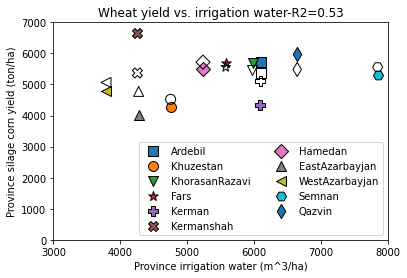

In [99]:
for i in range(N):
    plt.scatter(x_wat[i], y[i],marker=markers_[i],label=province[i],s=100,edgecolor='k')
    plt.scatter(x_wat[i], y_hat_lin1[i],marker=markers_[i],s=100,facecolor='none',edgecolor='k')

plt.xlabel('Province irrigation water (m^3/ha)')
plt.ylabel('Province silage corn yield (ton/ha)')
plt.legend(loc='lower right',ncol=2)
plt.xlim(left=3000,right=8000)
plt.ylim(bottom=0,top=7000)

plt.title("tomato yield vs. irrigation water-R2="+str(R2))
fig.savefig('fig\tomato_province_yield_vs_irrigwat.png', dpi=300)